# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

PCA is a variance maximizing procedure.  Stores probably vary most in their overall size and most aisles contain non-perishable items therefore "Grocery" being a catch-all category should be among the first principal components.  "Fresh" seems like the only other general/non-speciality category without special infrastructure needs (e.g. refridgeration, bakery ovens) so therefore able to be either small or very large and thus yielding large variance.  

With stores always having some (linear) combination of products the ICA dimensions should represent the independent ways that stores' purchasing patterns can be described.  While purchases are broken down into categories, there will likely be some correlations between purchases that ICA will remove.  Stores that sell a lot of "Fresh" produce probably have customers that do not buy a lot of "Frozen" pizzas.  While many types of customers shop at the same store, general store-level patterns will emerge.  Corner-style 'convenience' stores would sell more detergents and grocery type items, while produce markets with fresh items would likely not have delicatessens.

### PCA


PCA components
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  -0.98 -0.12    -0.06   -0.15              0.01         -0.07
1  -0.11  0.52     0.76   -0.02              0.37          0.06
2  -0.18  0.51    -0.28    0.71             -0.20          0.28
3  -0.04 -0.65     0.38    0.65              0.15         -0.02
4   0.02  0.20    -0.16    0.22              0.21         -0.92
5  -0.02  0.03     0.41   -0.01             -0.87         -0.27
Explained Variance
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]
Cumulative explained variance
[ 0.45961362  0.86478588  0.93481597  0.97883941  0.99386152  1.        ]


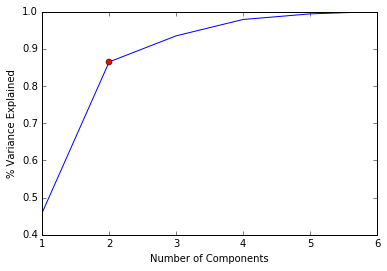

In [3]:
# Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)
data_pca = pca.transform(data)

# Print the components and the amount of variance in the data contained in each dimension
print
print "PCA components"
#print '    '.join(data.columns)
#print pca.components_
print pd.DataFrame(pca.components_.round(2), columns=data.columns)
print "Explained Variance"
print pca.explained_variance_ratio_
print "Cumulative explained variance"
csum = np.cumsum(pca.explained_variance_ratio_)
print csum
plt.plot([1,2,3,4,5,6], csum)
plt.plot([2],[.8648],'ro')
plt.xlabel("Number of Components")
plt.ylabel("% Variance Explained")

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 

The first two components capture 86% of the variance in the dataset. As shown in the cumulative variance explained plot, PCA performance drops off drastically with additional components after this point (shown in red).  Therefore, two components would be the best choice for an analysis as anything more would likely be overfitting to noise in the data.

**3)** What do the dimensions seem to represent? How can you use this information?

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  -0.98 -0.12    -0.06   -0.15              0.01         -0.07
1  -0.11  0.52     0.76   -0.02              0.37          0.06
2  -0.18  0.51    -0.28    0.71             -0.20          0.28
3  -0.04 -0.65     0.38    0.65              0.15         -0.02
4   0.02  0.20    -0.16    0.22              0.21         -0.92
5  -0.02  0.03     0.41   -0.01             -0.87         -0.27


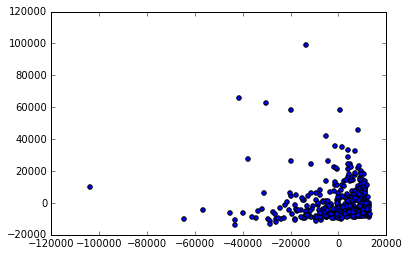

In [4]:
pca2 = PCA(n_components=2)
pca2.fit(data)
data_pca2 = pca2.transform(data)

print pd.DataFrame(pca.components_.round(2), columns=data.columns)

plt.scatter(data_pca[:,0], data_pca[:,1])

Answer: 

The first principal component is pointing mostly in the direction of "Fresh" with a magnitude of -0.98 followed by "Frozen" (-0.15) and "Milk" (-0.12).  

The second component points mostly towards "Grocery" (0.76) followed somewhat closely by "Milk" (0.52) and "Detergents/Paper" (0.37).  

The beauty of PCA is that calculations on the reduced data are equivalent to calculations in the original data space (minus, of course, the losses incurred by the estimation of PCA).
This means we can loosly think of stores as being some combination of selling mostly shelved "Groceries" and "Fresh" produce.  With two components, clustering analyses will be computationally easier and not burdened with extra dimensions.  With 86% of the variance explained we can be assured that generalizations made in a dimensionally reduced space will indeed be capturing actual trends.  

In [5]:
data_est = pd.DataFrame(pca2.inverse_transform(data_pca2).round(0), columns=data.columns)
print "Original Data"
print data.head()
print
print "PCA reduced data"
print pd.DataFrame(data_pca2).head()

print
print "PCA data projected back to original space"
print data_est.head()

print
print "Errors"
data_diffs =  pd.DataFrame(data-data_est, columns=data.columns)
print data_diffs.head()

Original Data
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

PCA reduced data
              0            1
0   -650.022122  1585.519090
1   4426.804979  4042.451509
2   4841.998707  2578.762176
3   -990.346437 -6279.805997
4 -10657.998731 -2159.725815

PCA data projected back to original space
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12460  6693     9204    3141              3456          1660
1   7230  7345    10770    2322              4390          1454
2   6987  6540     9625    2286              3858          1342
3  13662  2677     3211    3340               580          1234
4  22647  5974     6956    4736              20

Here we see the first rows of the original data, the PCA reduced data, the PCA data projected back to the original space, and finally the errors due to PCA estimation.

While some errors are sizeable, the explained variance is a reasonable 86% and any clustering will capture the major trends in the data that are represented in the first two principal components.

### ICA

In [6]:
# Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing

#remove the mean
scaler = preprocessing.StandardScaler(with_std=False)
data_stnd = scaler.fit_transform(data)

# 
ica_scale = preprocessing.StandardScaler()

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer:

In [7]:
# select random state to make interpretation of results repeatable
random_state = 3
ica = FastICA(n_components=6, whiten=True, random_state=random_state)
ica.fit(data_stnd)
data_ica = ica.transform(data_stnd)

print "ICA with 6 components"
# multiply by 10 for a more interpretable range with fewer zeros
print pd.DataFrame((1*ica.components_).round(6), columns=data.columns)


# Scale data to min/max range to interpret ICA components
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
data_ranged = mm_scaler.fit_transform(data)

store,the_component,mm,to_show = [],[],[],[]
for i in range(6):
    # save min of ICA data
    store.append(data_ica[:,i].argmin(axis=0))
    # save value for store that has the min
    to_show.append(data_ranged[store[-1],:].round(2))
    # for mulit-index
    the_component.append(i)
    mm.append('min')
    
    store.append(data_ica[:,i].argmax(axis=0))
    to_show.append(data_ranged[store[-1],:].round(2))
    the_component.append(i)
    mm.append('max')

tuples = list(zip(*[the_component, mm, store]))
the_index = pd.MultiIndex.from_tuples(tuples, names=['Comp','', 'Store'])
print 
print "Min/Max Scaled sales by category"
print pd.DataFrame(to_show, columns=data.columns, index=the_index)

ICA with 6 components
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.000000  0.000010 -0.000006 -0.000000          0.000003     -0.000006
1 -0.000000  0.000002  0.000012 -0.000001         -0.000028     -0.000006
2 -0.000000 -0.000000 -0.000001 -0.000001          0.000001      0.000018
3  0.000000 -0.000002  0.000006  0.000000         -0.000001     -0.000001
4 -0.000004  0.000001  0.000001  0.000001         -0.000002      0.000001
5  0.000001  0.000000 -0.000001 -0.000011          0.000001      0.000006

Min/Max Scaled sales by category
                Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Comp     Store                                                              
0    min 333     0.08  0.07     0.73    0.00              0.93          0.03
     max 86      0.20  1.00     0.35    0.02              0.49          0.02
1    min 333     0.08  0.07     0.73    0.00              0.93          0.03
     max 109     0.01  0.23     0.31    0

ICA components represent vectors that can be multiplied by the transformed data to recover the original data with minimal loss.

We can start to interpret ICA components by finding which value in the vector has the largest magnitude.  This will be the largest contributor in the transformed data.  

Then by finding the rows (i.e. stores) that ave the largest or smallest transformed values (purchases) and looking at where they fall in ranked order of we can show how the component relates to the original data.

For example, component 0 is mostly comprised of "Milk" purchases (0.000010) we therefore expect the ICA transformed values to generally correspond to values in the original "Milk" column.  Stores 333 and 86 have the min and max of ICA transformed "Milk" values and indeed, they are at the 7th and 100th percentile of sales in the original "Milk" column, therefore an increase in transformed data corresponds to increases in "Milk" purchases.  This component also has sizeable contribution of "Grocery". 

Component 1 is mostly points towards "Detergents/Paper" purchases (-0.000028).  Stores 333 and 109 have the min/max of ICA transformed "Detergents/Paper" and are at the 93rd and 2nd percentile of sales; smaller transformed values correspond to larger purchases.  "Grocery" also has a signigicant contribution in this component (0.000012) and "Grocery" purchases are close to the min and max (73rd and 31st percentile corresponding to min/max of transformed data); lower transformed values correspond to higher purchases.  This is in line with the high correlation between these two categories - having the same min/max ordering aligning with purchasing percentiles shows that there should be a positive correlation.  

r^2: 0.854960407183


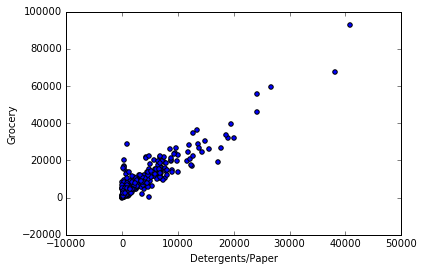

In [8]:
from sklearn.linear_model import LinearRegression
plt.scatter(data.Detergents_Paper, data.Grocery)
plt.xlabel("Detergents/Paper")
plt.ylabel("Grocery")

regr = LinearRegression()
regr.fit(data.values[:,2].reshape(-1,1), data.values[:,4].reshape(-1,1))
print "r^2:",regr.score(data.values[:,2].reshape(-1,1), data.values[:,4].reshape(-1,1))

Component 2 is mostly comprised of "Delicatessen" purchases (0.000018).  Stores 125 and 183 are at the min and max of transformed values and the 2nd and 100th percentile of "Delicatessen" purchases; higher transformed values correspond to higher "Delicatessen" purchases.

Component 3 mostly points towards "Grocery" (0.000006) purchases with some contribution of "Milk" (-0.000002).  Stores 358 and 85 are at the min and max of transformed values and the 2nd and 100th percentile of "Grocery" purchases; higher transformed values correspond to higher "Grocery" purchases.  

Component 4 mostly points towards "Fresh" (-0.000004) purchases.  Stores 181 and 109 are the the min and max of transformed values and the 100th and 1st percentile of "Fresh" purchases; smaller transformed values correspond to higher "Fresh" purchases.

Component 5 mostly points in the direction of "Frozen" (-0.000011) with some contribution of "Delicatessen" (0.000006).  Stores 325 and 23 are the the min and max of transformed values and 100th and 8th percentile of "Frozen" purchases; smaller transformed values correspond to higher "Frozen" purchases.

As opposed to PCA which achieves maximum variance for successive components, ICA ensures independence which allows any subset of components to be used for further analysis.  Designing an experiment to test distibution schedules based on the original categories could be problematic because of the correlations that existed which ICA removed.  With independent categories any statistical analyses will be more sound because effects will not be attributable to correlations.

The choice for what number of components to initially calculate will affect the returned components and could require some ammount of insight into the data or investigating many options.  For this project we can use components 3 and 4 ("Grocery" and "Fresh") to compare clustering outcomes with those derrived from PCA.

In [37]:
data_ica2 = data_ica[:,[3,4]]

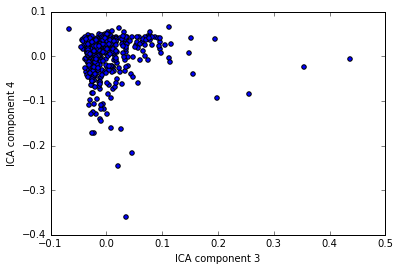

In [39]:
plt.scatter(data_ica2[:,0], data_ica2[:,1])
plt.xlabel("ICA component 3")
plt.ylabel("ICA component 4")

These two ICA components look to have a similar distribution as the first two principal components from PCA.

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

KMeans clustering is well suited to paritition data into groups.  However, it does not do well when ideal clusters are elongated as it assumes equal variance.  KMeans is comparatively fast but can get stuck in local minima.  Therefore clustering is typically repeated to ensure that the preferred solution is converged on most often.  

Gaussian Mixture Models find data clusters for which gaussian distributions are maximally likely to predict the categorization for some number of gropus.  This allows points to be probablisticly defined and not strictly categorized which gives information on the size and dispersion of groups rather than a partition of group A, group B, etc..  It is of course ideal when data are normally distributed possibly with separate variances along each axis excelling where KMeans falls short.  

KMeans will be better suited for this dataset.  Sales in each category are exponentially distributed, and not combinations of gaussians (shown below).  Forcing a fit to a gaussian model will thus fail at describing any actual clusterings.  The PCA reduced data we are clustering on is essentially one mass of points most of which fall relatively close to the origin.  This is not ideal for GMM.  KMeans will be able to partition the dataset into separate categories.

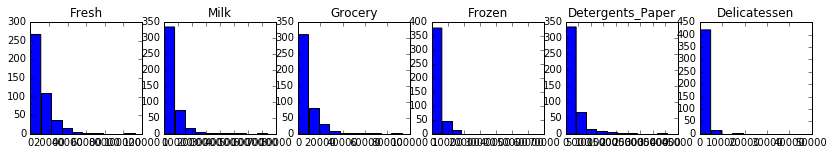

In [72]:
plt.figure(figsize=(14,2))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.hist(data[data.columns[i]], bins=10)
    plt.title(data.columns[i])

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [26]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [27]:
# First we reduce the data to two dimensions using PCA to capture variation
reduced_data = data_pca2
reduced_ica_data = data_ica2
print reduced_data[:5]  # print upto 5 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]]


In [28]:
# Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = KMeans(n_clusters=3).fit(reduced_data)
print clusters
clusters5 = KMeans(n_clusters=5).fit(reduced_data)
print clusters5
clusters_gmm3 = GMM(n_components=3).fit(reduced_data)
clusters_gmm5 = GMM(n_components=5).fit(reduced_data)
#print clusters_gmm

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [29]:
3# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - .1, reduced_data[:, 0].max() + .1
y_min, y_max = reduced_data[:, 1].min() - .1, reduced_data[:, 1].max() + .1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))


# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
Z5 = clusters5.predict(np.c_[xx.ravel(), yy.ravel()])
Zgmm3 = clusters_gmm3.predict(np.c_[xx.ravel(), yy.ravel()])
Zgmm5 = clusters_gmm5.predict(np.c_[xx.ravel(), yy.ravel()])

In [30]:
# Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
print centroids
centroids5 = clusters5.cluster_centers_
centroids_gmm3 = clusters_gmm3.means_
centroids_gmm5 = clusters_gmm5.means_
#print centroids_gmm
#print centroids5

[[  1497.13461172  24998.27760147]
 [-24220.71188261  -4364.45560022]
 [  4106.90273941  -3168.41202086]]


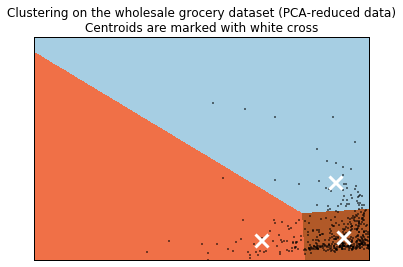

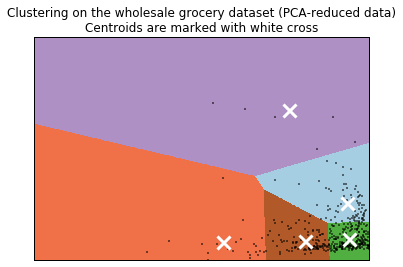

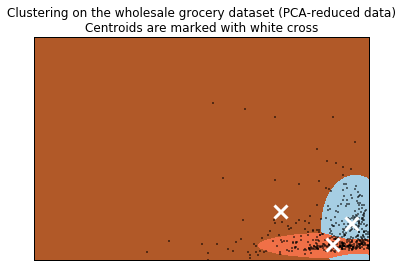

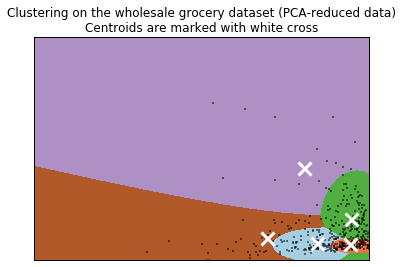

In [31]:
def color_plot(Z, centroids):# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    ax =plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title(the_title)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
the_title = 'Clustering on the wholesale grocery dataset (PCA-reduced data)\nCentroids are marked with white cross'
color_plot(Z, centroids)
color_plot(Z5, centroids5)
color_plot(Zgmm3, centroids_gmm3)
color_plot(Zgmm5, centroids_gmm5)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


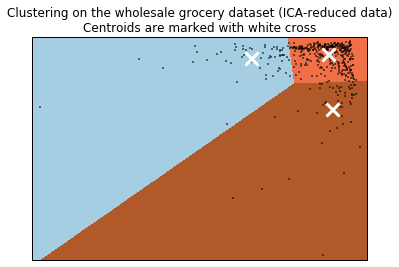

In [32]:
clusters_ica = KMeans(n_clusters=3).fit(reduced_ica_data)
print clusters_ica

reduced_data = reduced_ica_data
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - .01, reduced_data[:, 0].max() + .01
y_min, y_max = reduced_data[:, 1].min() - .01, reduced_data[:, 1].max() + .01
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

Zi = clusters_ica.predict(np.c_[xx.ravel(), yy.ravel()])
centroids_ica = clusters_ica.cluster_centers_

the_title = 'Clustering on the wholesale grocery dataset (ICA-reduced data)\nCentroids are marked with white cross'
color_plot(Zi, centroids_ica)


**7)** What are the central objects in each cluster? Describe them as customers.

In [33]:
# Find closest point in PCA reduced data to each centroid
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(data_pca2) 

# apply labels from 3 cluster KMeans model
data['PredLabel'] = clusters.labels_

dd=['Category']
for c in centroids:
    d = neigh.kneighbors([c], 1, return_distance=False)
    #print d[0][0]
    dd.append('Store '+str(d[0][0]))

print pd.DataFrame(zip(data.columns, data.values[142,:],data.values[409,:],data.values[163,:]), columns=dd)

           Category  Store 163  Store 142  Store 409
0             Fresh      37036       8708       5531
1              Milk       7152       3634      15726
2           Grocery       8253       6100      26870
3            Frozen       2995       2349       2367
4  Detergents_Paper         20       2123      13726
5      Delicatessen          3       5137        446
6         PredLabel          1          2          0


Answer: 

The 3 cluster KMeans model gives the best, and simplest explaination.  With 2 principal components the data are generally divided among groups that 1) have large values along the first axis, 2) have large values along the second axis, or 3) have small values in both axis categories.  Finding 5 categories does produce more groups along the same continuum which may prove valuable for some analysis.  However, there is no further generalization made about groups outside of that continuum, i.e., there appear to be no other 'pockets' to be found.  A higher dimensional space could show other grouping, but as discussed above the data fit well in 2-D space and adding a factor would likely lead to modelling noise.  

The data point closest to each centroid represents the average customer in each cluster.  These store types can be described in the following ways. 

Larger stores that specialize in "Fresh" produce (Store 142).  While these stores buy a lot and sell a lot, the fresh nature of their stocked products will be more likely to be replentished more frequently.

Small stores that buy smaller amounts of "Fresh" and "Grocery" items (Store 409).  These stores are more likely to be affected by less frequent bulk deliveries because of their over-all lower sales amounts.  Because the distributions of purchases are exponential, rather than gaussian, the centroid of this category ends up being an average, carry everything store,  but still one that generally sells less across categories. 

Larger stores that specialize in "Grocery" shelved items (Store 163).  These stores are likely able to manage storing surpluses of non-perishable items while waiting for the next delivery.  Because "Fresh" products are not a major component of their sales, bulk deliveries should be fine.



### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

Two-component ICA and PCA yeilded very similar KMeans clustering results for 3 groups so it is difficult to evaluate them on that metric.  Further exploration could determine whether different combinations of choosing 2 of the 6 ICA components results in better clustering, but PCA reduction seems to do quite well.  Finding 3 clusters captured the generalization that stores tend to purchase either a lot of "Fresh" products or a lot of "Grocery", but not both.  Finding 5 clusters only further refined this generalization to low/med/high purchases along "Fresh" and "Grocery" axes. If further tests with a High/Low distinction prove unreliable, a Low/Med/High grouping may be more appropriate.

GMM seemed to be not well suited for this data.  There were strange pockets left out of 'primary' categories that seemed to be left for the last gaussian to pick up.  Neither sales by category or PCA or ICA reduced data looked gaussian so this seems reasonable.

I was tempted at first (after initially looking at the scatterplot matrix to get a feel for the data) to think that "Detergents/Paper" and "Grocery" correlation was going to be the main driver of patterns in the data.  While that relationship did appear as an ICA component, clustering by those axes could have been questionable.  Two of the groups derrived from PCA reduction overlap and the difference between those store types would have been lost.



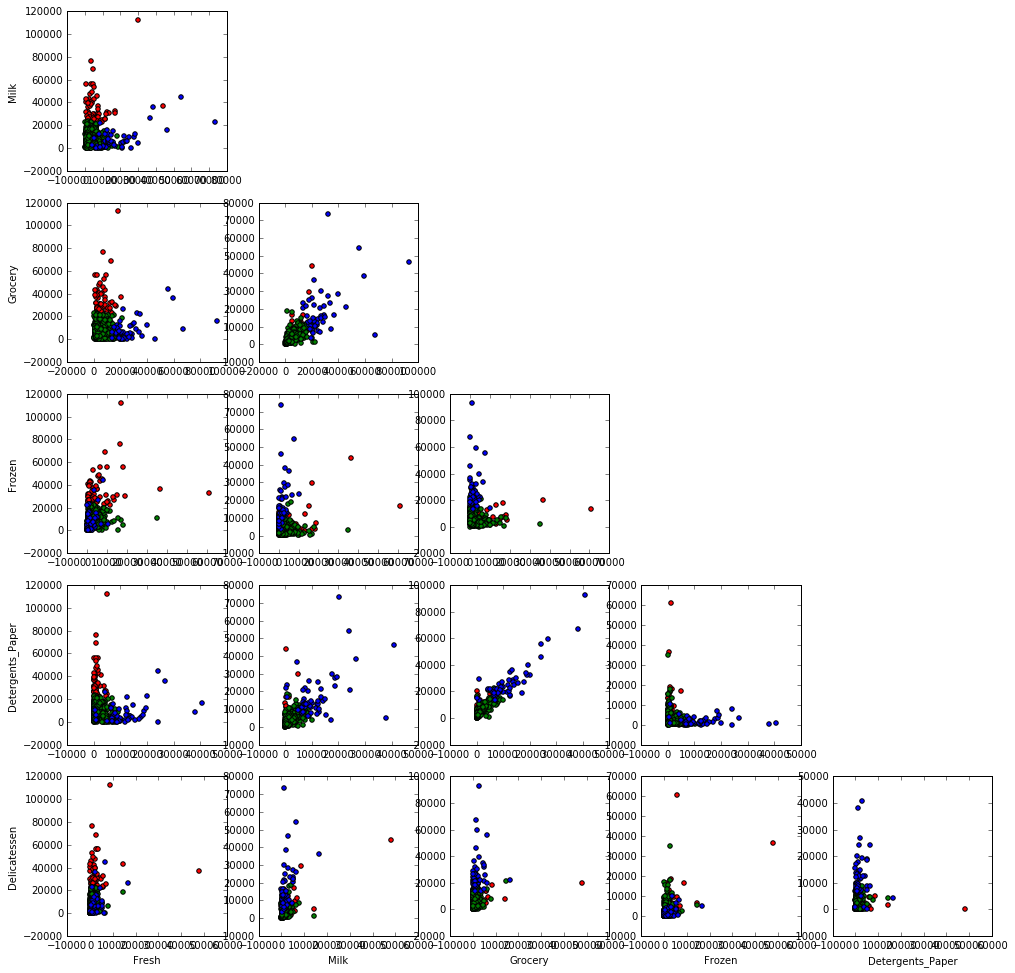

In [80]:
ls = clusters.labels_
#clusters.cluster_centers_

cats = data.columns
#print cats
plt.figure(figsize=(20,20))
for i in range(6):
    for j in range(0,i+0):#i,6):
        p = (i*6)+j+1
        plt.subplot(6,6,p)
        for c, ci, target_name in zip("rgb", [0, 1, 2], ["1","2","3"]):
            plt.scatter(data[cats[i]][ls == ci], data[cats[j]][ls == ci], c=c, label=target_name)
            #plt.scatter(data[cats[i]], data[cats[j]],)
        if i == 5:#0:
            plt.xlabel(cats[j])
        if j == 0:#5:
            plt.ylabel(cats[i])

**9)** How would you use that technique to help the company design new experiments?

Answer: 

The wholesale company can use an AB test to evaluate delivery options on groups of customers independently rather than across the board.  This grouping will ensure that new method will not randomly happen to select stores of a particular type that happen to behave in a particular way.  With groups of types of stores we can evaluate how a particular method affects groups in their own way.

**10)** How would you use that data to help you predict future customer needs?

Answer: 

One can analyze patterns within customer categories.  By plotting purchasing patterns between each pairs of product types we can attempt to guess additional customer trends.

With colored customer categories we can immediately see the relationship between "Fresh" and "Grocery" categories (first column, second row), which are what the PCA dimensions mostly represent.  Other patterns now emerge and we can see the relationship between the other products that certain types of stores buy. 

A supervized learning approach of regression or decision trees could be implemented using these categories to predict how much of other product types will be ordered.  This could help streamline timely delivery of all types of products.

Additionally, customers in each cluster may be interested in different products or different product packaging.  For example smaller/larger sizes, multi-packs, etc.  Larger stores, like Costco, will be most interested in selling items of large volume that corner stores would be less interested in.


## Log Analysis

Given the exponential shape of purchasing patterns I here briefly explore a log transformed analysis.



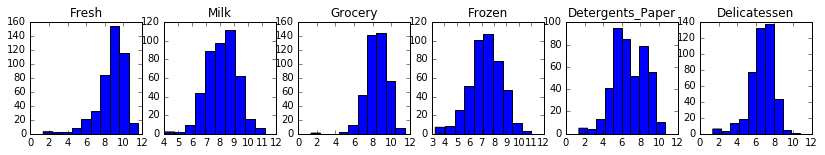

In [19]:
data = pd.read_csv("wholesale-customers.csv")

from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
data_log = transformer.fit_transform(data)
#print data_log.shape
#data_log = pd.DataFrame(data_log, columns=data.columns)

plt.figure(figsize=(14,2))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.hist(data_log[:,i], bins=10)
    plt.title(data.columns[i])

PCA components
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0 -0.175984  0.396467  0.454773 -0.174101          0.743476      0.148181
1  0.684287  0.165904  0.072854  0.492210          0.043605      0.504725
2  0.680074 -0.037713  0.028850 -0.315789          0.213921     -0.624308
3 -0.193613  0.012341  0.062975  0.791333          0.201966     -0.539813
4  0.000652 -0.721938 -0.344568  0.034283          0.563260      0.204059
5  0.028190 -0.540852  0.815076  0.017675         -0.203783      0.022278
Explained Variance
[ 0.44374606  0.27667282  0.1150988   0.09589157  0.04573598  0.02285477]
Cumulative explained variance
[ 0.44374606  0.72041888  0.83551768  0.93140925  0.97714523  1.        ]


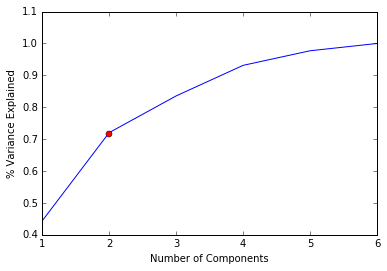

In [20]:
pcaL = PCA(n_components=6)
pcaL.fit(data_log)
pcaL2 = PCA(n_components=2)
pcaL2.fit(data_log)

#print pd.DataFrame(zip(data.columns, pca2.components_.T.round(2)))
#print pd.DataFrame(pcaL.components_.round(2), columns=data.columns)

print "PCA components"
#print '    '.join(data.columns)
#print pca.components_
print pd.DataFrame(pcaL.components_, columns=data.columns)
print "Explained Variance"
print pcaL.explained_variance_ratio_
print "Cumulative explained variance"
csum = np.cumsum(pcaL.explained_variance_ratio_)
print csum
plt.figure(1)
plt.plot([1,2,3,4,5,6], csum)
plt.plot([2],[.715],'ro')
plt.xlabel("Number of Components")
plt.ylabel("% Variance Explained")


data_pcaL = pcaL.transform(data_log)
data_pcaL2 = pcaL2.transform(data_log)
#
#plt.subplot(111)
#plt.scatter(data_ica3[:,0], data_ica3[:,1])
#pcaL = FastICA(n_components=2, whiten=True)
#data_pcaL = ica.fit_transform(data_log)




PCA reduction does not perform as well, 3 components are required to achieve the same level of explained variance as before.  I will continue with 2 components here just for simplicity.  The top two correspond to 1) "Detergents/Paper" and 2) "Fresh" followed closely by "Delicatessen" and "Frozen".  This is quite different from the original PCA clustering of "Fresh" vs "Grocery" which made intuitive sense in terms of perishable and non-perishable items. 

Centroids
[[ 2.03205469 -2.27020771]
 [-1.77102386 -0.03284716]
 [ 1.5866236   1.23079772]]


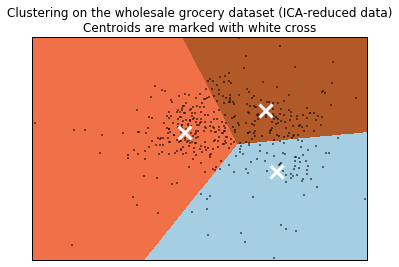

In [21]:
log_clusters = KMeans(n_clusters=3).fit(data_pcaL2)
#log_clusters = GMM(n_components=3).fit(data_pcaL2)

reduced_data = data_pcaL2

# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - .1, reduced_data[:, 0].max() + .1
y_min, y_max = reduced_data[:, 1].min() - .1, reduced_data[:, 1].max() + .1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

Zlog = log_clusters.predict(np.c_[xx.ravel(), yy.ravel()])

centroids_log = log_clusters.cluster_centers_
#centroids_log = clusters_gmm3.means_

print "Centroids"
print centroids_log


plt.figure(2)
color_plot(Zlog, centroids_log)


I tried some GMM clustering, but because there seems to be a single 'cluster' to be partitioned, KMeans looks to do just fine.

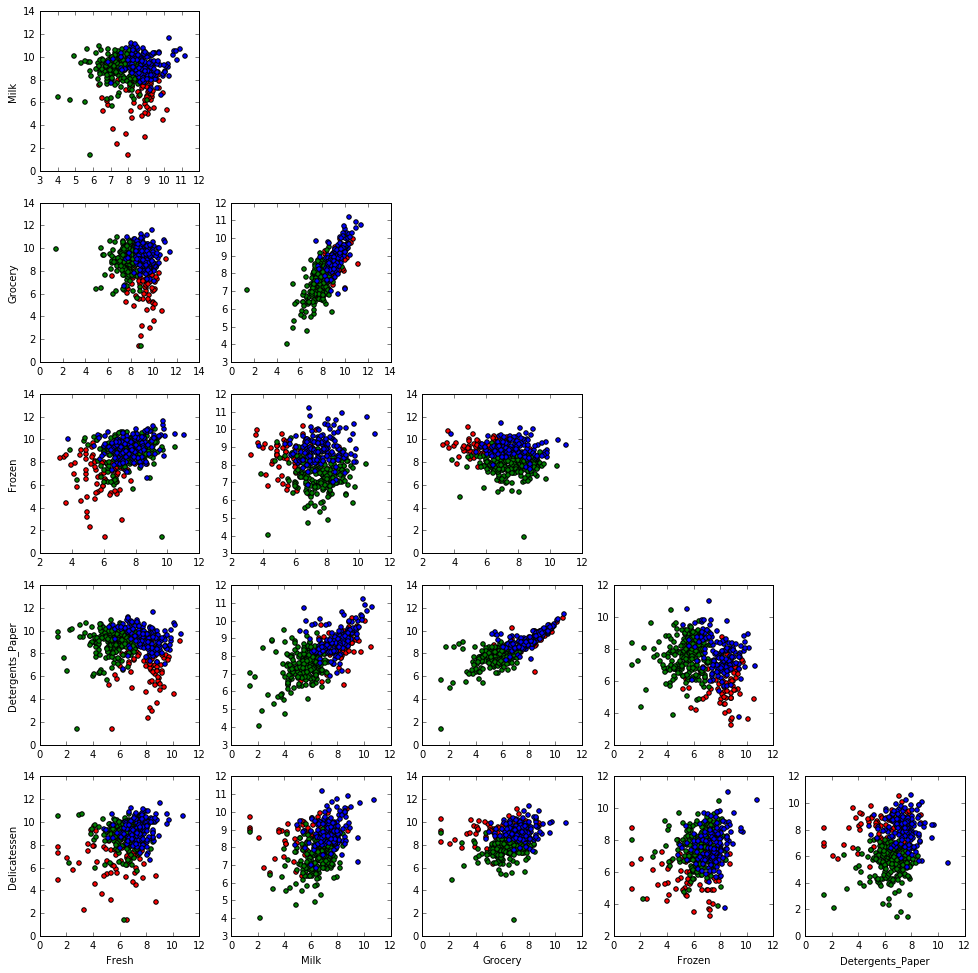

In [22]:
ls = log_clusters.labels_
#ls = log_clusters.predict(reduced_data)
#clusters.cluster_centers_


cats = data.columns
#print cats
plt.figure(figsize=(20,20))
for i in range(6):
    for j in range(0,i+0):#i,6):
        p = (i*6)+j+1
        plt.subplot(6,6,p)
        for c, ci, target_name in zip("rgb", [0, 1, 2], ["1","2","3"]):
            #plt.scatter(data[cats[i]][ls == ci], data[cats[j]][ls == ci], c=c, label=target_name)
            plt.scatter(data_log[ls == ci,i], data_log[ls == ci,j], c=c, label=target_name)
            ##plt.scatter(data_pca2[i][ls == ci], data_pca2[j][ls == ci], c=c, label=target_name)
            #plt.scatter(data_log[:,i], data_log[:,j], c=c, label=target_name)
            #plt.scatter(data[cats[i]], data[cats[j]],)
        if i == 5:#0:
            plt.xlabel(cats[j])
        if j == 0:#5:
            plt.ylabel(cats[i])

The PCA is mostly comprised of "Detergents/Paper" and "Fresh" which corresponds to the 4th row in the first colums.  Perhaps the most striking difference from the original data is that the three clusters correspond to high purchases along both axes and low along each axis individually.  This is opposite from before where one cluster was low along both axes and the other two corresponded to high values for each factor.  Though, not a proof, this seems to come from the log transformation which speads out the majority of stores that had mostly low purchases for each product category.  

It could be argued that the log transformation captures the real trend in store types: smaller stores with particular specialities vs large stores that carry everything.  For small stores a \$100 difference in purchases may significantly shift their focus while a large store wouldn't notice purchasing differences smaller than \$10,000.  This would suggest that the dollar scale is not evenly spaced and that something like a log transform makes sense.